In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import sys
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# import seaborn as sns
%matplotlib inline
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import median_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error 
# warnings.filterwarnings('ignore', category=DeprecationWarning)
#from yellowbrick.regressor import PredictionError
from sklearn.linear_model import Lasso
from sklearn.multioutput import MultiOutputRegressor

# Dataset Ground Truth

In [2]:
# Loading the dataset/Import the dataset
video_data = pd.read_csv('../video_quality.csv')
# csv_metrics = pd.read_csv("http://vod.icomp.ufam.edu.br/video_dataset/csvs_metrics/video_quality.csv")

In [3]:
# Read only one part
video_data.head(10)

,RESOLUCAO,BITRATE,QP,FPS,PSNR,SSIM,LPIPS,VMAF
0,34560000,153140.4,23,30,37.830948,0.841709,NaN,NaN
1,34560000,70482.2,29,30,34.691950,0.768763,NaN,NaN
2,34560000,48405.0,32,30,33.236920,0.723732,NaN,NaN
3,34560000,116526.4,26,30,36.754460,0.787863,NaN,NaN
4,34560000,72227.2,30,30,34.758755,0.737197,NaN,NaN
5,34560000,50704.8,33,30,33.091034,0.689270,NaN,NaN
6,34560000,72189.4,29,30,35.854400,0.753501,NaN,NaN
7,34560000,41255.6,34,30,33.332720,0.685049,NaN,NaN
8,34560000,33090.2,36,30,32.209446,0.652938,NaN,NaN
9,34560000,54408.0,25,30,36.030660,0.803115,NaN,NaN


# Data Transformation

In [4]:
# Drop columns VMAF and LPIPS
videodata = video_data.drop(['LPIPS', 'VMAF'], axis=1)

In [5]:
videodata.head(5)

,RESOLUCAO,BITRATE,QP,FPS,PSNR,SSIM
0,34560000,153140.4,23,30,37.830948,0.841709
1,34560000,70482.2,29,30,34.691950,0.768763
2,34560000,48405.0,32,30,33.236920,0.723732
3,34560000,116526.4,26,30,36.754460,0.787863
4,34560000,72227.2,30,30,34.758755,0.737197


In [6]:
# Check out missing datas
videodata.isnull()

,RESOLUCAO,BITRATE,QP,FPS,PSNR,SSIM
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [7]:
# Returns a boolean indicatiing whether each row is a duplicate or not
videodata.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2610    False
2611    False
2612    False
2613    False
2614    False
2615    False
2616    False
2617    False
2618    False
2619    False
2620    False
2621    False
2622    False
2623    False
2624    False
2625    False
2626    False
2627    False
2628    False
2629    False
2630    False
2631    False
2632    False
2633    False
2634    False
2635    False
2636    False
2637    False
2638    False
2639    False
Length: 2640, dtype: bool

In [8]:
def createDataFrame(videodata):
    list_dict = []
    
    for j in range(0, len(videodata), 3):
        
        dict_metrics = {}
        
        dict_metrics["RESOLUCAO"] = videodata["RESOLUCAO"][j]
        dict_metrics["FPS"] = videodata["FPS"][j]
        
        dict_metrics["BITRATE1"] = videodata["BITRATE"][j]
        dict_metrics["BITRATE2"] = videodata["BITRATE"][j+1]
        dict_metrics["BITRATE3"] = videodata["BITRATE"][j+2]
        
        dict_metrics["PSNR1"] = videodata["PSNR"][j]
        dict_metrics["PSNR2"] = videodata["PSNR"][j+1]
        dict_metrics["PSNR3"] = videodata["PSNR"][j+2]
        
        dict_metrics["SSIM1"] = videodata["SSIM"][j]
        dict_metrics["SSIM2"] = videodata["SSIM"][j+1]
        dict_metrics["SSIM3"] = videodata["SSIM"][j+2]
        
        dict_metrics["QP1"] = videodata["QP"][j]
        dict_metrics["QP2"] = videodata["QP"][j+1]
        dict_metrics["QP3"] = videodata["QP"][j+2]
        
        list_dict.append(dict_metrics)
            
    return list_dict

dframe_csv = pd.DataFrame(createDataFrame(videodata))
dframe_csv.head()

,BITRATE1,BITRATE2,BITRATE3,FPS,PSNR1,PSNR2,PSNR3,QP1,QP2,QP3,RESOLUCAO,SSIM1,SSIM2,SSIM3
0,153140.4,70482.2,48405.0,30,37.830948,34.691950,33.236920,23,29,32,34560000,0.841709,0.768763,0.723732
1,116526.4,72227.2,50704.8,30,36.754460,34.758755,33.091034,26,30,33,34560000,0.787863,0.737197,0.689270
2,72189.4,41255.6,33090.2,30,35.854400,33.332720,32.209446,29,34,36,34560000,0.753501,0.685049,0.652938
3,54408.0,21092.8,13912.2,30,36.030660,32.363934,27.200453,25,31,34,34560000,0.803115,0.718049,0.603503
4,178198.8,86051.0,55346.4,30,34.702904,32.138020,30.708460,26,31,34,34560000,0.654312,0.532417,0.455694


In [9]:
# Here, the columns order is changed
col_titles = ['RESOLUCAO','FPS','BITRATE1','BITRATE2','BITRATE3','PSNR1','PSNR2','PSNR3','SSIM1','SSIM2','SSIM3','QP1','QP2','QP3']
dframe_csv = dframe_csv.reindex(columns=col_titles)

# Here, gets the resolution 640x340
df_video360p = dframe_csv.iloc[:220:]

# Here, gets the target (QP)
target_qp = np.zeros(shape=(220, 3), dtype=np.int)

for index in range(len(df_video360p)):
    target_qp[index] = df_video360p['QP1'].iloc[index],  df_video360p['QP2'].iloc[index],  df_video360p['QP3'].iloc[index]

# dropping passed columns 
df_video360p.drop(["QP1", "QP2", "QP3"], axis = 1, inplace = True)
df_video360p.head()

/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,RESOLUCAO,FPS,BITRATE1,BITRATE2,BITRATE3,PSNR1,PSNR2,PSNR3,SSIM1,SSIM2,SSIM3
0,34560000,30,153140.4,70482.2,48405.0,37.830948,34.691950,33.236920,0.841709,0.768763,0.723732
1,34560000,30,116526.4,72227.2,50704.8,36.754460,34.758755,33.091034,0.787863,0.737197,0.689270
2,34560000,30,72189.4,41255.6,33090.2,35.854400,33.332720,32.209446,0.753501,0.685049,0.652938
3,34560000,30,54408.0,21092.8,13912.2,36.030660,32.363934,27.200453,0.803115,0.718049,0.603503
4,34560000,30,178198.8,86051.0,55346.4,34.702904,32.138020,30.708460,0.654312,0.532417,0.455694


In [10]:
# target = videos640x340.set_index(['QP'], drop=True)
# Separating the independent variables from dependent variables
# x = videos640x340.iloc[:,:-1]
# y = videos640x340.iloc[:,5]

# X =  videos640x340.drop('QP' , axis=1)
# y = np.array(videos640x340['QP'])

In [23]:
# Use MinMaxScaler to scale the data
norm_data = MinMaxScaler(feature_range=(0, 1), copy=True)
X = norm_data.fit_transform(df_video360p)
y = target_qp
y = norm_data.fit_transform(y)

In [24]:
# Train Test Split
# ** Split your data into a training set and a testing set.**

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(176, 11)
(44, 11)
(176, 3)
(44, 3)


# Random Forest Regressor

In [ ]:
regr = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=100)
pred = regr.fit(X_train, y_train)
y_pred = pred.predict(X_test)
median_absolute_error(y_test, y_pred)

In [ ]:
plt.scatter(X_test[:, 1], X_test[:, 4], c=y_pred, s=30, cmap=plt.cm.Paired)

# Support Vector Regression (SVR)

In [27]:
# Regressor Mult-Target
svr_reg = MultiOutputRegressor(SVR(kernel='rbf', gamma=0.001, C=1000, epsilon=.1, degree=8))
svr_reg.fit(X_train, y_train)
y_pred = svr_reg.predict(X_test)

In [28]:
# Regressor
# svr = SVR(kernel='rbf', gamma=0.001, C=1000, epsilon=.1, degree=8)
# svr.fit(X_train, y_train)
# y_pred = svr.predict(X_test)

# mae = median_absolute_error(y_test, y_pred)
# print("Mean Absolute Error:", mae)

# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)

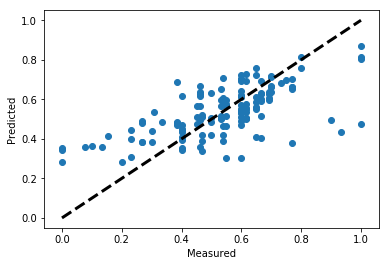

In [29]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
# Black broken line is the predicted values.

In [ ]:
# plt.scatter(X_test[:, 1], X_test[:, 3], c=y_pred, s=30, cmap=plt.cm.Paired)

In [ ]:
x_ax = range(len(X_test))
plt.scatter(x_ax, y_test, s=10, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=1.5, color="red", label="predicted")
plt.legend()
plt.show()

In [ ]:
# ## Model Evaluation
# 
# **Now get predictions from the model and create a confusion matrix and a classification report.**
# pred = svm.predict(X_test)
# print(confusion_matrix(y_test,pred))

# Support Vector Machine (SVM) / Multi-Class Classification